# (Loan Data from Prosper)
## by (Ahmed Tarek)

## Preliminary Wrangling

> This data set contains 113,937 loans with 81 variables on each
loan, including loan amount, borrower rate (or interest rate),
current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## Assessing data

In [2]:
df = pd.read_csv('prosperLoanData.csv')
df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [5]:
# checking if there is duplicated data
sum(df.duplicated())

0

In [6]:
# checking null values
df.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [7]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

### Quality:
- There are null values some can be droped others no

### Tidiness: 
- Some columns wont be necessary

## Cleaning data

In [8]:
# droping columns that are not necessary
cols = ['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade', 'ClosedDate', 'BorrowerRate', 'LenderYield', 
        'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)', 'ListingCategory (numeric)',
        'BorrowerState', 'EmploymentStatusDuration','IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled', 
        'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years',
        'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries', 
        'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years',
        'PublicRecordsLast12Months','RevolvingCreditBalance', 'BankcardUtilization','AvailableBankcardCredit', 'TotalTrades',
        'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months', 'DebtToIncomeRatio', 'IncomeVerifiable',
        'StatedMonthlyIncome', 'LoanKey', 'TotalProsperLoans', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate',
        'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding',
        'ScorexChangeAtTimeOfListing', 'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber',
        'LoanMonthsSinceOrigination', 'LoanNumber', 'LoanOriginationDate', 'LoanOriginationQuarter', 'MemberKey',
        'MonthlyLoanPayment', 'LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees',
        'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss', 'LP_NonPrincipalRecoverypayments',
        'PercentFunded', 'Recommendations', 'InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount', 'Investors']

df.drop(cols, axis =1, inplace=True)

In [9]:
# replacing null values with 0 in TotalProsperPaymentsBilled because we cant drop them for the values are 
# number of on time payments the borrower made on Prosper loans at the time they created this listing, and this value 
# will be null if the borrower had no prior loans.
df.TotalProsperPaymentsBilled.fillna(0, inplace = True)

In [10]:
# droping null values
df.dropna(inplace = True)

In [11]:
df

,Term,LoanStatus,BorrowerAPR,ProsperRating (Alpha),ProsperScore,Occupation,EmploymentStatus,CreditScoreRangeLower,CreditScoreRangeUpper,IncomeRange,TotalProsperPaymentsBilled,LoanOriginalAmount
1,36,Current,0.12016,A,7.0,Professional,Employed,680.0,699.0,"$50,000-74,999",0.0,10000
3,36,Current,0.12528,A,9.0,Skilled Labor,Employed,800.0,819.0,"$25,000-49,999",0.0,10000
4,36,Current,0.24614,D,4.0,Executive,Employed,680.0,699.0,"$100,000+",11.0,15000
5,60,Current,0.15425,B,10.0,Professional,Employed,740.0,759.0,"$100,000+",0.0,15000
6,36,Current,0.31032,E,2.0,Sales - Retail,Employed,680.0,699.0,"$25,000-49,999",0.0,3000
...,...,...,...,...,...,...,...,...,...,...,...,...
113932,36,Current,0.22354,C,5.0,Food Service Management,Employed,700.0,719.0,"$50,000-74,999",0.0,10000
113933,36,FinalPaymentInProgress,0.13220,A,8.0,Professional,Employed,700.0,719.0,"$75,000-99,999",60.0,2000
113934,60,Current,0.23984,D,3.0,Other,Employed,700.0,719.0,"$25,000-49,999",0.0,10000
113935,60,Completed,0.28408,C,5.0,Food Service,Full-time,680.0,699.0,"$25,000-49,999",16.0,15000


In [12]:
# check if there are duplicates
sum(df.duplicated())

2461

In [13]:
# droping duplicates
df.drop_duplicates(inplace = True)

In [14]:
df

,Term,LoanStatus,BorrowerAPR,ProsperRating (Alpha),ProsperScore,Occupation,EmploymentStatus,CreditScoreRangeLower,CreditScoreRangeUpper,IncomeRange,TotalProsperPaymentsBilled,LoanOriginalAmount
1,36,Current,0.12016,A,7.0,Professional,Employed,680.0,699.0,"$50,000-74,999",0.0,10000
3,36,Current,0.12528,A,9.0,Skilled Labor,Employed,800.0,819.0,"$25,000-49,999",0.0,10000
4,36,Current,0.24614,D,4.0,Executive,Employed,680.0,699.0,"$100,000+",11.0,15000
5,60,Current,0.15425,B,10.0,Professional,Employed,740.0,759.0,"$100,000+",0.0,15000
6,36,Current,0.31032,E,2.0,Sales - Retail,Employed,680.0,699.0,"$25,000-49,999",0.0,3000
...,...,...,...,...,...,...,...,...,...,...,...,...
113931,60,Current,0.15016,B,6.0,Analyst,Employed,800.0,819.0,"$75,000-99,999",0.0,25000
113932,36,Current,0.22354,C,5.0,Food Service Management,Employed,700.0,719.0,"$50,000-74,999",0.0,10000
113933,36,FinalPaymentInProgress,0.13220,A,8.0,Professional,Employed,700.0,719.0,"$75,000-99,999",60.0,2000
113935,60,Completed,0.28408,C,5.0,Food Service,Full-time,680.0,699.0,"$25,000-49,999",16.0,15000


In [15]:
# saving cleaned data to another file
df.to_csv('prosperLoanData_cleaned.csv', encoding='utf-8',index=False)

### What is the structure of your dataset?

> - 113937 loans (rows)
> - 81 attributes (columns)

### What is/are the main feature(s) of interest in your dataset?

> - The Borrower's Annual Percentage Rate (APR) for the loan
> - The loan statues and what attributes affect it

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> - ProsperScore
> - ProsperRating (Alpha)
> - Occupation
> - CreditScoreRangeLower and CreditScoreRangeUpper
> - Term
> - LoanOriginalAmount
> - TotalProsperPaymentsBilled
> - IncomeRange
> - EmploymentStatus

## Univariate Exploration

### Lets take a look at the BorrowerAPR

In [16]:
# reading data
df_loans = pd.read_csv('prosperLoanData_cleaned.csv')

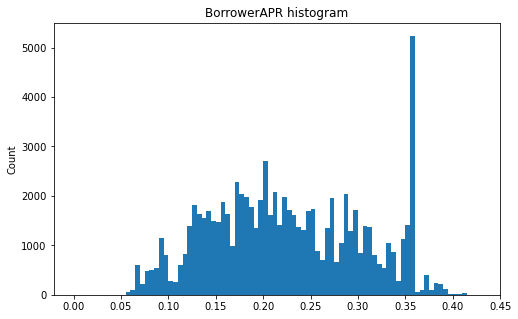

In [17]:
# counts for BorrowerAPR values
bins = np.arange(0, df_loans.BorrowerAPR.max(), 0.005)
plt.figure(figsize=[8, 5])
plt.hist(data = df_loans, x = 'BorrowerAPR', bins = bins)
plt.xticks(np.arange(0, df_loans.BorrowerAPR.max()+0.05, 0.05))
plt.ylabel('Count')
plt.title('BorrowerAPR histogram');

It appears that this distribution is multimodal with several peaks. A peak at 0.08, 0.2, 0.28, and an exceptionally high peak at 0.36.

#### Let's look at Prosper Score which is a custom risk score built using historical Prosper data.

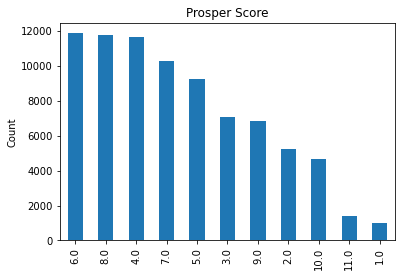

In [18]:
# Bar Chart ProsperScore
def plot1():
    df_loans.ProsperScore.value_counts().plot(kind='bar')
    plt.ylabel('Count')
    plt.title('Prosper Score');
    
plot1()

This shows that there are scores above 10 which is not possible since the score is from 1-10. This data must be removed.

In [19]:
# excluding all borrowers with a Prosper Score of 11
df_loans = df_loans[df_loans.ProsperScore != 11]

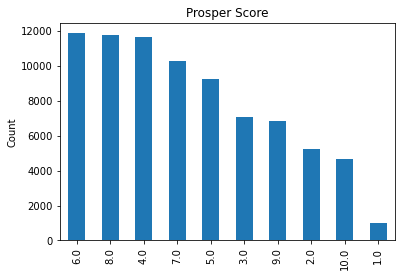

In [20]:
# ploting the bar chart again
plot1()

Most of the borrower got Prosper Score of 6 that means they are safe to loan. Notice that even customers with a low risks score of 1 or 2 did get a loan. Not many borrowers received the highest score of 10.

#### Now lets look at ProsperRating (Alpha) and Occupation

Before plotting, the ProsperRating (Alpha) should be ordered from low to high so there won't be any misleading visualization about the rating order

In [21]:
# Convert ProsperRating into ordered categorical types
rate_order = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = rate_order)
df_loans['ProsperRating (Alpha)'] = df_loans['ProsperRating (Alpha)'].astype(ordered_var)

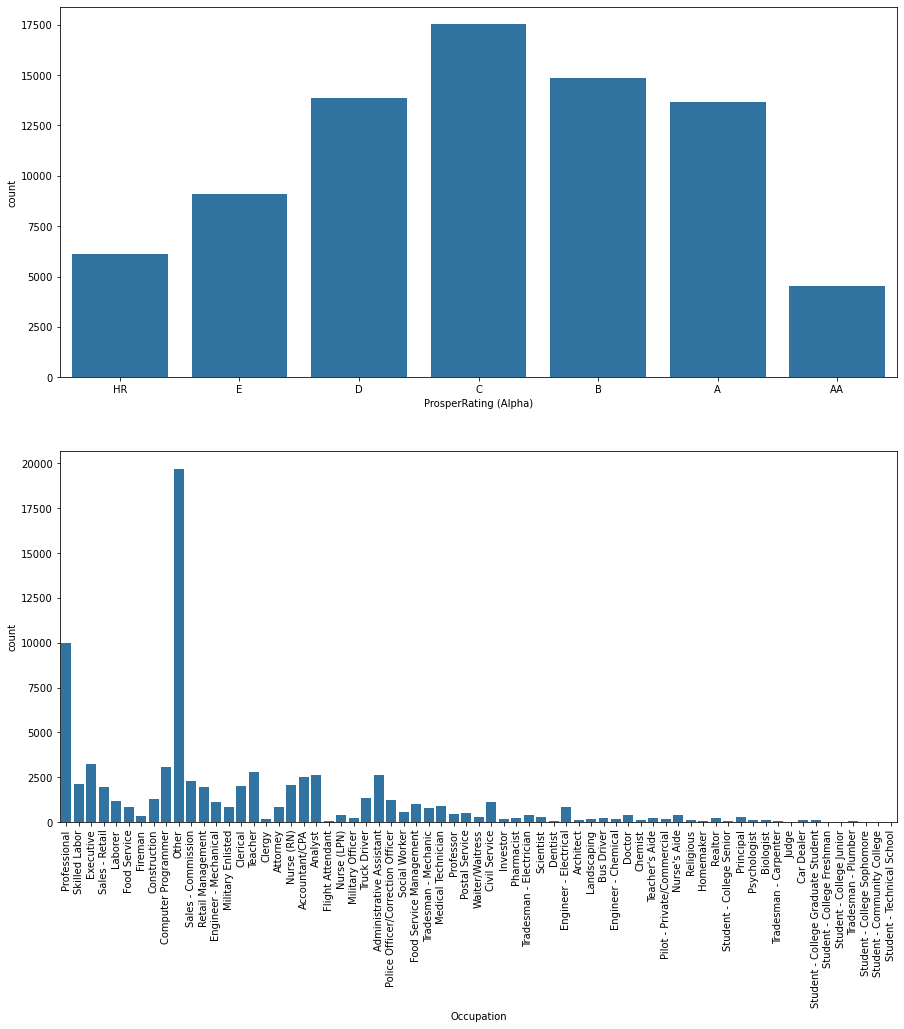

In [22]:
fig, ax = plt.subplots(nrows=2, figsize = [15,15])
default_color = sb.color_palette()[0]
sb.countplot(data = df_loans, x = 'ProsperRating (Alpha)', color = default_color, ax = ax[0])
sb.countplot(data = df_loans, x = 'Occupation', color = default_color, ax = ax[1])
plt.xticks(rotation=90);

It appears that most borrowers were rated from C to A, and students are the least to take loans 

#### Now, let's compare the Prosper rating (Alpha) mean with the Borrower APR mean

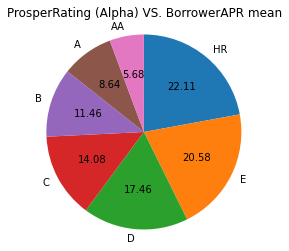

In [23]:
# ploting bar chart for ProsperRating vs BorrowerAPR mean
ProsperRatingAlpha_mean = df_loans.groupby('ProsperRating (Alpha)').BorrowerAPR.mean()

plt.pie(ProsperRatingAlpha_mean, labels = ProsperRatingAlpha_mean.index, startangle = 90, counterclock = False, autopct='%1.2f')
plt.axis('square') 
plt.title('ProsperRating (Alpha) VS. BorrowerAPR mean');

Notice that the highest rating of AA received the lowest BorrowerAPR (5.68), while the lowerest rating of HR received the highest BorrowerAPR (22.11). This shows that borrowers with higher ratings received lower BorrowerAPR.

#### I am interested in knowing more about the LoanOriginalAmount

In [24]:
# getting overview over the loan amount
df_loans.LoanOriginalAmount.describe()

count    79645.000000
mean      9021.664034
std       6203.914172
min       1000.000000
25%       4000.000000
50%       7500.000000
75%      13000.000000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

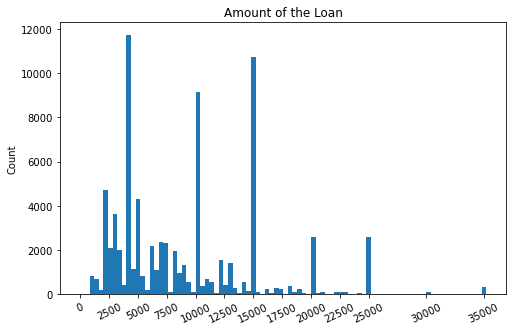

In [25]:
# Histogramm for The origination amount of the loan
binsize = 400
bins = np.arange(0, df_loans.LoanOriginalAmount.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loans, x = 'LoanOriginalAmount', bins = bins)
plt.ylabel('Count')
plt.title('Amount of the Loan')
plt.xticks([0,2500,5000,7500,10000,12500,15000,17500,20000,22500,25000,30000,35000], rotation=25);

The histogram has serval peaks at around 4,000, 10,000, and 15,000. But most of the values are in the lower end between 2500 and 10,000. The most loaned amounts are 4,000 and 15,000.

#### Now lets see if there is a relation between the LoanOriginalAmount and Term

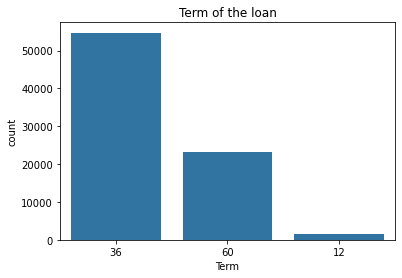

In [26]:
# Bar chart of the length of the loan in months
base_color = sb.color_palette()[0]
sb.countplot(data = df_loans, x='Term', color = base_color, order = df_loans.Term.value_counts().index)
plt.title('Term of the loan');

Most of the loans have a length of 36 months. The fact that most of the loans have a length of just 36 months might be correlated to the fact the average loan amount is around 9000 which can be paid back quickly.

#### Lets look at the CreditScoreRangeLower and CreditScoreRangeUpper

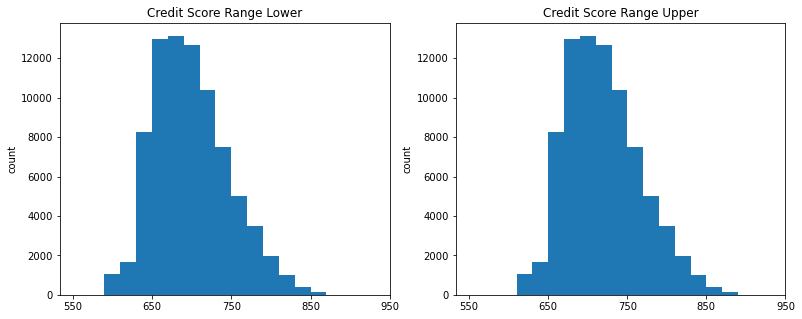

In [27]:
# Histogram for CreditScoreRangeLower and CreditScoreRangeUpper
plt.figure(figsize = [13, 5]) 


plt.subplot(1, 2, 1)
bins = np.arange(550, df_loans.CreditScoreRangeLower.max(), 20)
plt.hist(data = df_loans, x = 'CreditScoreRangeLower', bins = bins)
plt.xticks(np.arange(550, 1000, 100))
plt.title('Credit Score Range Lower')
plt.ylabel('count');

plt.subplot(1, 2, 2)
bins = np.arange(550, df_loans.CreditScoreRangeUpper.max(), 20)
plt.hist(data = df_loans, x = 'CreditScoreRangeUpper', bins = bins)
plt.xticks(np.arange(550, 1000, 100))
plt.title('Credit Score Range Upper')
plt.ylabel('count');

The two histograms show similar trends, and there are no outliers that fall out of the range.

### Now lets take a look at the loan status

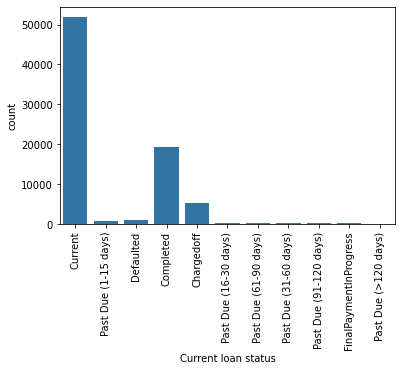

In [28]:
# bar chart LoanStatus for the current status of the loan
def plot2():
    base_color = sb.color_palette()[0]
    sb.countplot(data = df_loans, x = 'LoanStatus', color = base_color)
    plt.xlabel('Current loan status')
    plt.xticks(rotation = 90);
    
plot2()

Combining the past dues into one column since it is not important to show that much information

In [29]:
# replacing Past Due (1-15 days)etc. with just Past Due
df_loans.LoanStatus = df_loans.LoanStatus.replace(['Past Due (1-15 days)', 'Past Due (31-60 days)','Past Due (61-90 days)',
                                                   'Past Due (91-120 days)','Past Due (16-30 days)',
                                                   'Past Due (>120 days)'],'Past Due')

df_loans.LoanStatus.value_counts()

Current                   51857
Completed                 19355
Chargedoff                 5191
Past Due                   2043
Defaulted                   999
FinalPaymentInProgress      200
Name: LoanStatus, dtype: int64

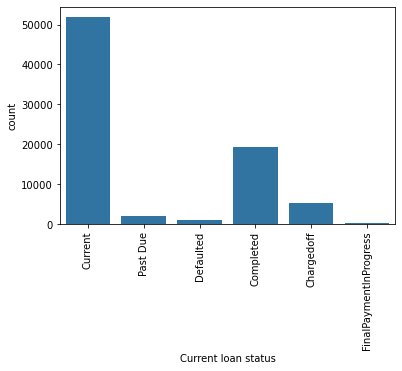

In [30]:
# plotting the bar chart of LoanStatus again
plot2()

Most of the loans are current or completed.

#### Now the IncomeRange

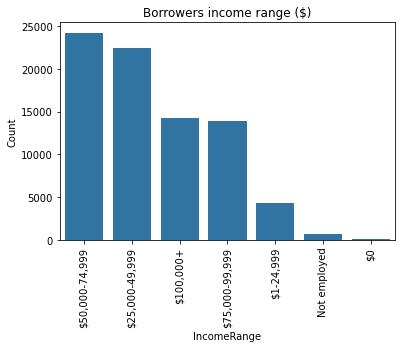

In [31]:
# Bar chart of the borrowers income range 
sb.countplot(data= df_loans, x= 'IncomeRange', color= base_color, order = df_loans.IncomeRange.value_counts().index)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Borrowers income range ($)');

The income range of the borrowers shows that most of the loans were given to customers with an income between 25,000 and 74,999. Notice that people that are not employed, or have an income of 0 received a loan as well. They might be other criteria than the income that qualifies one to get a loan like being a student.

#### Lets check the EmploymentStatus to find out

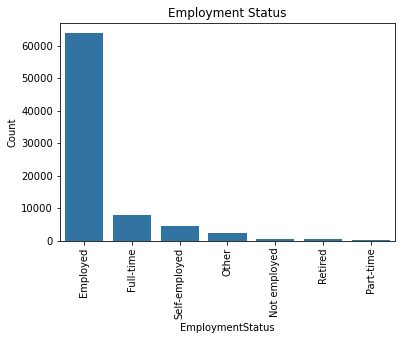

In [32]:
# plotting the borrowers employment status 
sb.countplot(data= df_loans, x= 'EmploymentStatus', color= base_color, order = df_loans.EmploymentStatus.value_counts().index)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Employment Status');

Of course, most of the borrowers are employed, but the data shows that retired persons got a loan too.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> - The distribution of borrowers' APR most of the values are between 0.05 and 0.4. but there is one value that was higher than the rest there might be a reason that this value is used that much. Therefore, there is no need to perform any transformations.
> - Most of the loans are current or completed. However, there are a fairly significant number of loans that are
charged off, defaulted, or past due.
> - The income range of the borrowers shows that most of the loans were to give to customers with an income between
25,000 and 74,999.
> - Most of the borrower got Prosper Score of 6 that means they are safe to loan. Notice that even customers with a low risks score of 1 or 2 did get a loan. Not many borrowers received the highest score of 10.
> - Most of the loans have a length of 36 months. The fact that most of the loans have a length of just 36 months might be correlated to the fact the average loan amount is around 9000 which can be paid back quickly.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> - Notice in the distribution of the Employment status that people that are not employed,  or have an income of 0 received a loan. There might be other criteria than that qualifies one to get a loan like being a student or retired.
> - The bar chart of the Prosper Score showed that there are customers in the data set that have a score of 11 which is not possible since the score is from 1-10, this data was removed.
> - Combining the past dues into one column since it is not important to show that much information.

## Bivariate Exploration

#### Lets look at the numeric variables

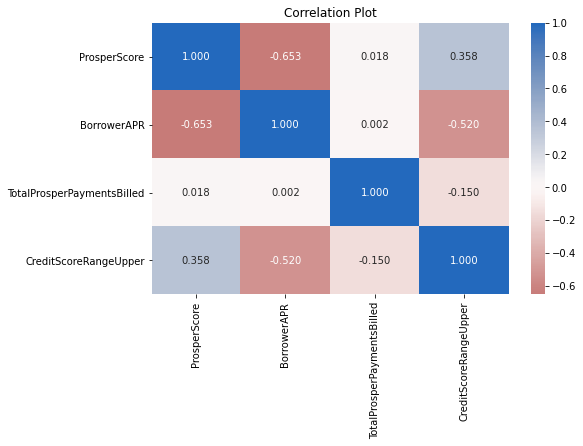

In [33]:
# correlation plot for numeric variables
num_var = ['ProsperScore', 'BorrowerAPR', 'TotalProsperPaymentsBilled', 'CreditScoreRangeUpper']

plt.figure(figsize = [8, 5])
sb.heatmap(df_loans[num_var].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.title('Correlation Plot');

There are no strong positive relationships between any pairs. BorrowerAPR and ProsperScore are negative because borrowers with a lower score are more likely to pay higher APR. CreditScore and BorrowerAPR are also negative because the higher the borrowers CreditScore the more trustworthy they are, therefore they received lower APR.

#### Lets look more closely at ProsperScore vs BorrowerAPR 

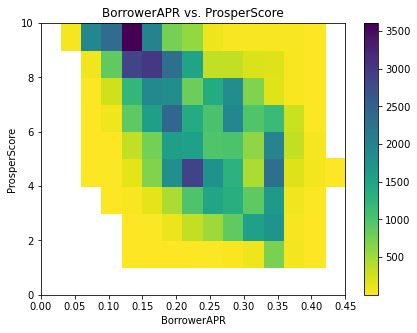

In [34]:
# heat plot for comparing ProsperScore and BorrowerAPR
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 2)
bins_x = np.arange(0, df_loans.BorrowerAPR.max()+0.05, 0.03)
bins_y = np.arange(0, df_loans.ProsperScore.max()+1, 1)
plt.hist2d(data = df_loans, x = 'BorrowerAPR', y = 'ProsperScore', bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('BorrowerAPR')
plt.ylabel('ProsperScore');

This also proves that people with higher ratings tend to be more trustworthy and therefore given lower BorrowerAPR.

#### Now  BorrowerAPR vs. CreditScoreRangeUpper

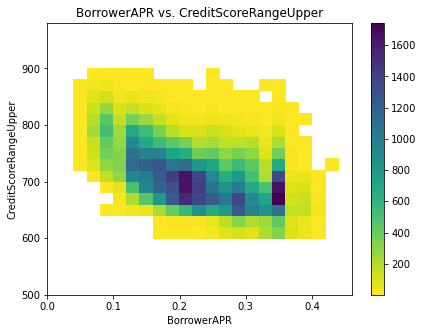

In [35]:
# heat plot for comparing ProsperScore and BorrowerAPR
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 2)
bins_x = np.arange(0, df_loans.BorrowerAPR.max()+0.05, 0.02)
bins_y = np.arange(500, df_loans.CreditScoreRangeUpper.max()+100, 20)
plt.hist2d(data = df_loans, x = 'BorrowerAPR', y = 'CreditScoreRangeUpper', bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.title('BorrowerAPR vs. CreditScoreRangeUpper')
plt.xlabel('BorrowerAPR')
plt.ylabel('CreditScoreRangeUpper');

We can see the trend that the higher the CreditScore the lower the APR.

####  let's look at relationships between the categorical features.

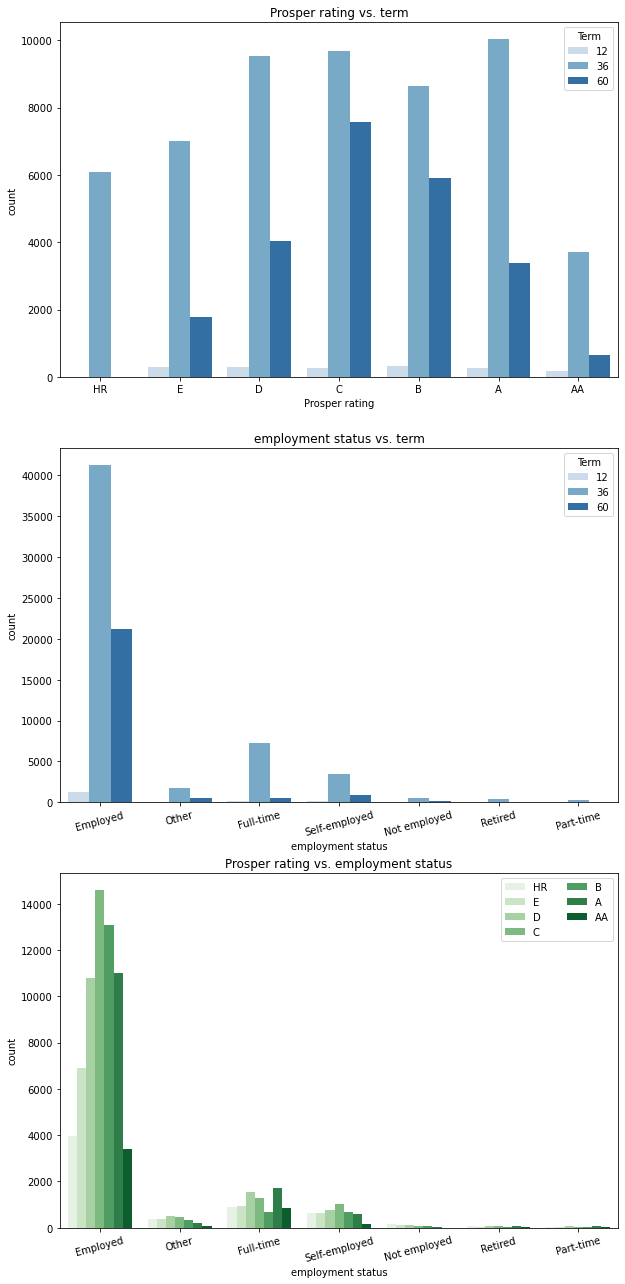

In [36]:
plt.figure(figsize = [10, 30])

# Prosper rating vs. term
plt.subplot(4, 1, 1)
sb.countplot(data = df_loans, x = 'ProsperRating (Alpha)', hue = 'Term', palette = 'Blues')
plt.xlabel('Prosper rating')
plt.title('Prosper rating vs. term')

# employment status vs. term
ax = plt.subplot(4, 1, 2)
sb.countplot(data = df_loans, x = 'EmploymentStatus', hue = 'Term', palette = 'Blues')
plt.xticks(rotation = 15)
plt.xlabel('employment status')
plt.title('employment status vs. term')


# Prosper rating vs. employment status
ax = plt.subplot(4, 1, 3)
sb.countplot(data = df_loans, x = 'EmploymentStatus', hue = 'ProsperRating (Alpha)', palette = 'Greens')
ax.legend(loc = 1, ncol = 2)
plt.xticks(rotation = 15)
plt.xlabel('employment status')
plt.title('Prosper rating vs. employment status');

We can see that there is an interaction between term and Prosper rating. The most popular term was 36 and most of the employed especially with full-time jobs took that kind of loan. And of course, the higher proper ratings were given to the employed personnel.

#### Lets see how borrower APR and loan original amount are related

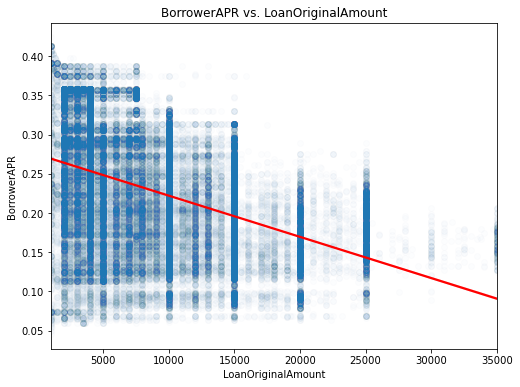

In [37]:
# how borrower APR and loan original amount are related 
plt.figure(figsize = [8, 6])
sb.regplot(data = df_loans, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.01}, line_kws={'color':'red'})
plt.title('BorrowerAPR vs. LoanOriginalAmount');

This relation shows that the range of APR decreases with the increase in the loan amount. Overall, the borrower's APR is negatively correlated with the loan amount.

#### Now the relation between LoanStatus and LoanOriginalAmount

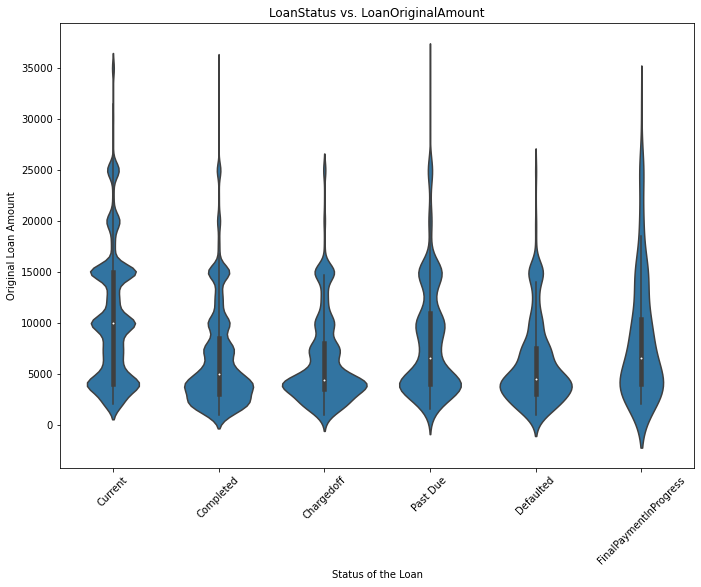

In [38]:
# plotting original loan amount with a violinplot against LoanStatus
plt.figure(figsize = [25, 18])

plt.subplot(2, 2, 2)
sb.violinplot(data = df_loans, x = 'LoanStatus', y = 'LoanOriginalAmount', color = base_color, order = df_loans.LoanStatus.value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Status of the Loan')
plt.ylabel('Original Loan Amount')
plt.title('LoanStatus vs. LoanOriginalAmount');

The original loan amount is about the same on average for loans that are completed, current. However, loans with past due payments have on average a higher original loan amount.

#### Now the relation between loan status and loan total prosper payments billed

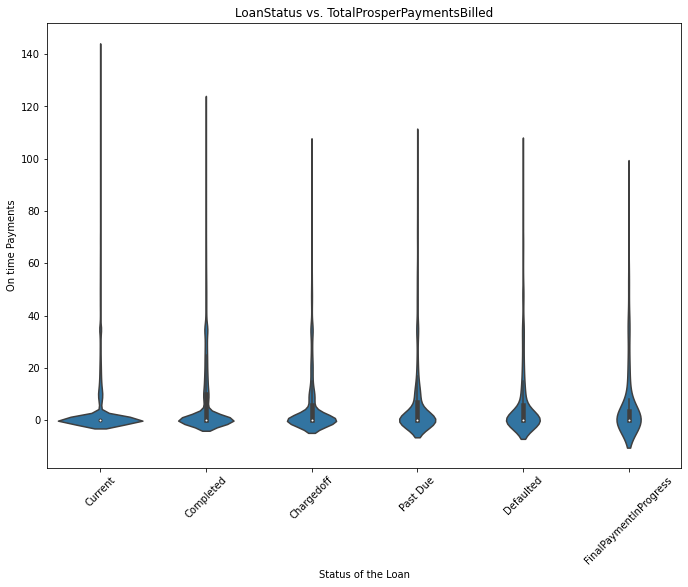

In [39]:
# plotting TotalProsperPaymentsBilled (On time Payments) with a violinplot against LoanStatus 
plt.figure(figsize = [25, 18])

plt.subplot(2, 2, 2)
sb.violinplot(data = df_loans, x = 'LoanStatus', y = 'TotalProsperPaymentsBilled', color = base_color, order = df_loans.LoanStatus.value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Status of the Loan')
plt.ylabel('On time Payments')
plt.title('LoanStatus vs. TotalProsperPaymentsBilled');

Current loans have on average the highest number of on time payments while loans with the status charged-off and defaulted have the lowest.

#### Relation between loan status and term

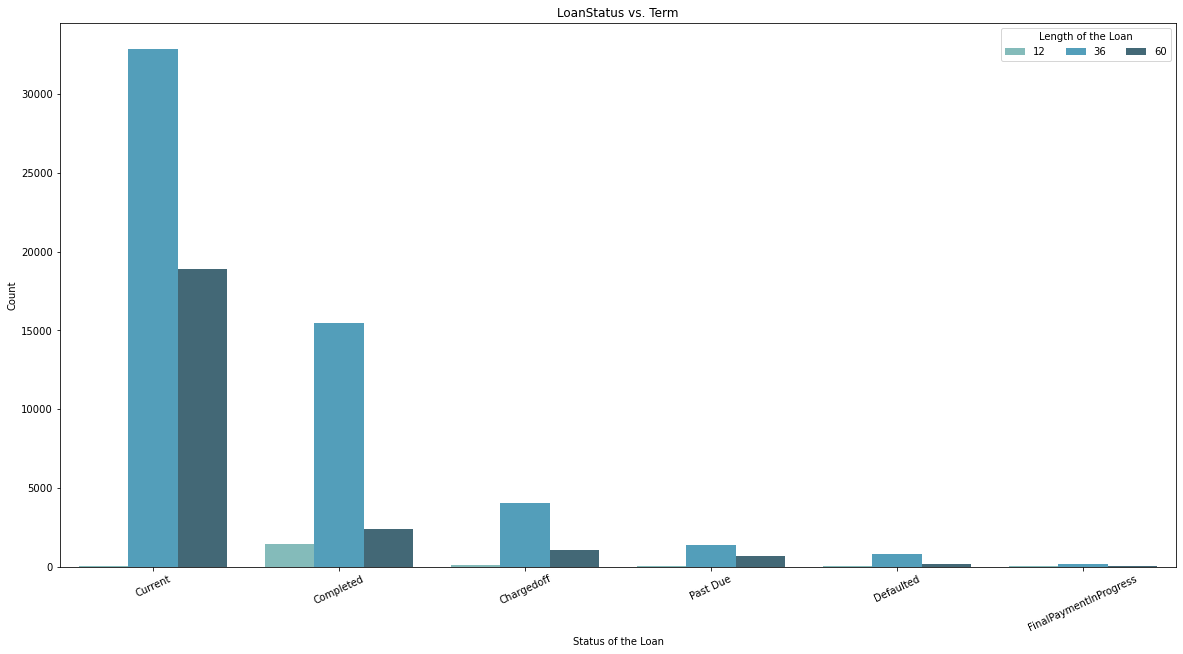

In [40]:
# plotting length of the Loans against LoanStatus a clusterd bar chart
plt.figure(figsize = [20,10])

ax = sb.countplot(data = df_loans, x = 'LoanStatus', hue = 'Term', palette = "GnBu_d", order = df_loans.LoanStatus.value_counts().index)
plt.legend(loc = 1, ncol = 3, title = 'Length of the Loan')
plt.xticks(rotation = 25)
plt.xlabel('Status of the Loan')
ax.set_ylabel('Count')
plt.title('LoanStatus vs. Term');

No matter what status a loan has, the most common length is 36 months and the least common is 60 months.

#### Relation between loan status and employment status

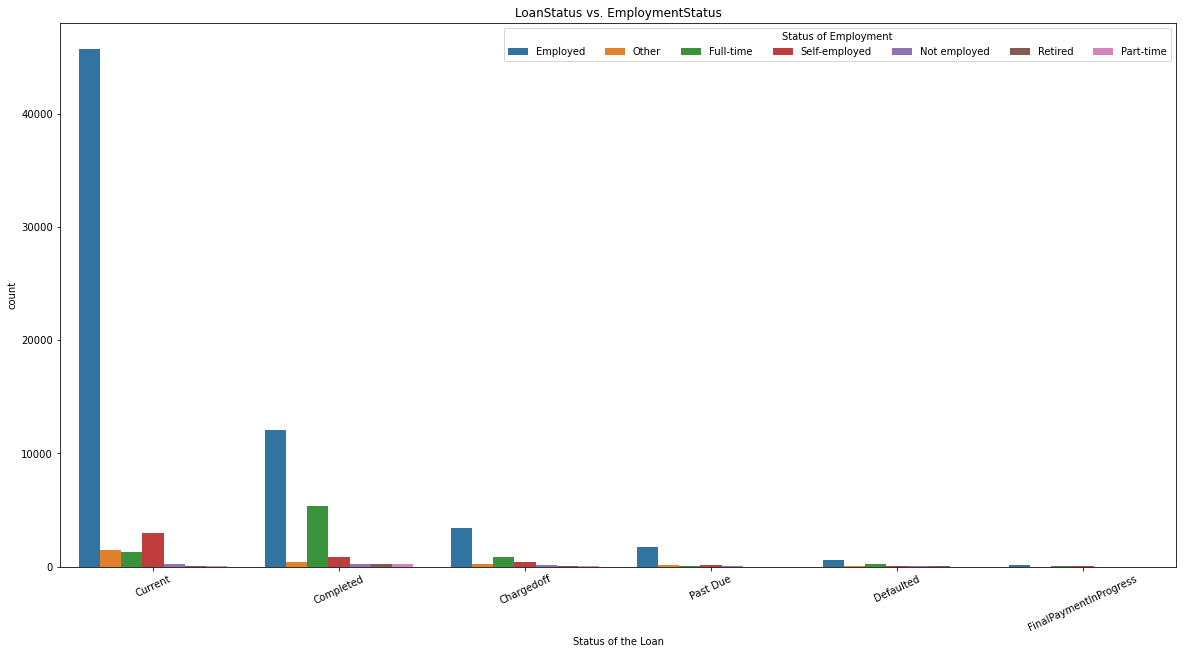

In [41]:
# plotting EmploymentStatus against LoanStatus
plt.figure(figsize = [20,10])

sb.countplot(data = df_loans, x = 'LoanStatus', hue = 'EmploymentStatus', order = df_loans.LoanStatus.value_counts().index)
plt.legend(loc = 1, ncol = 8, title = 'Status of Employment')
plt.xticks(rotation = 25)
plt.xlabel('Status of the Loan')
plt.title('LoanStatus vs. EmploymentStatus');

The status of the employment of the borrower seems not to have an impact on the outcome of the loan. but again the ones who take loans mostly are employed as also the ones who completed their loans are the full-time employed.

#### Relation between loan status and income range

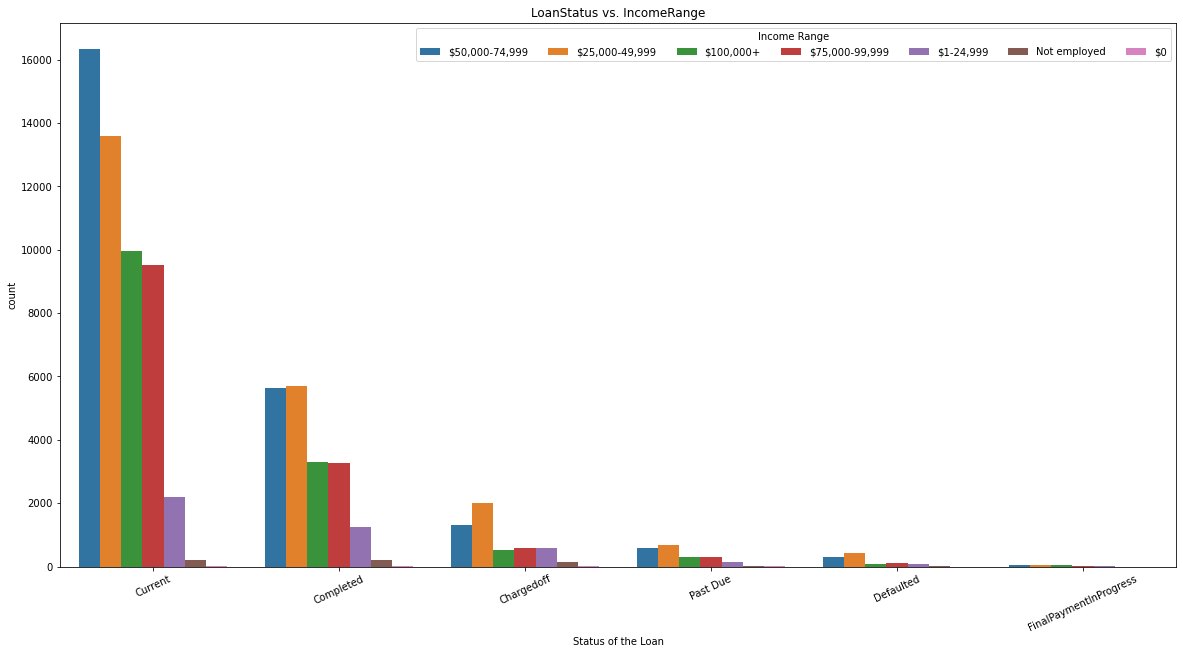

In [42]:
# plotting Income Range against LoanStatus
plt.figure(figsize = [20,10])

sb.countplot(data = df_loans, x = 'LoanStatus', hue = 'IncomeRange', order = df_loans.LoanStatus.value_counts().index)
plt.legend(loc = 1, ncol = 8, title = 'Income Range')
plt.xticks(rotation = 25)
plt.xlabel('Status of the Loan')
plt.title('LoanStatus vs. IncomeRange');

The borrowers who have an Income Range of (25000 - 74999) seem to be the ones who get more loans and pay them on time.

#### Relation between prosper score and loan status 

In [43]:
# first I need to reshape the data 
reshape = df_loans.groupby(['LoanStatus', 'ProsperScore']).size()
reshape = reshape.reset_index(name = 'count')
reshape = reshape.pivot(index = 'ProsperScore', columns = 'LoanStatus', values = 'count')
reshape

LoanStatus,Chargedoff,Completed,Current,Defaulted,FinalPaymentInProgress,Past Due
ProsperScore,,,,,,
1.0,234,341,331,37,2,40
2.0,374,837,3696,70,22,248
3.0,396,1046,5302,74,20,250
4.0,727,1755,8639,118,28,354
5.0,860,2121,5823,162,24,278
6.0,911,2823,7602,173,25,325
7.0,660,2347,6924,135,16,217
8.0,664,3692,7014,139,39,229
9.0,308,2824,3547,71,13,70


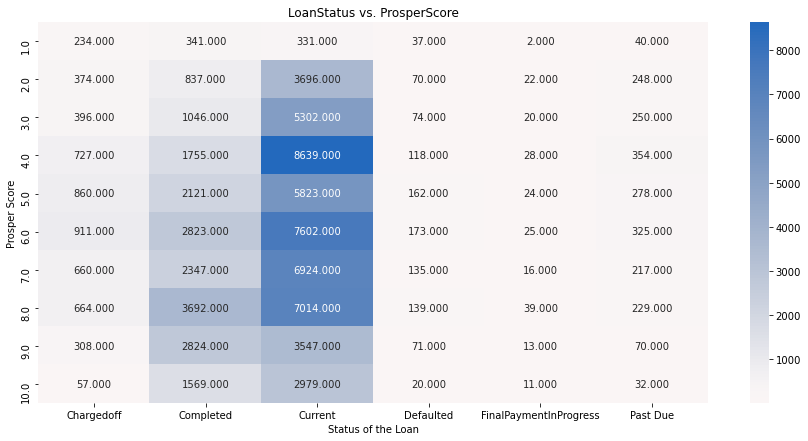

In [44]:
# plotting ProsperScore against LoanStatus with a heat map
plt.figure(figsize = [15,7])

sb.heatmap(reshape, annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.xlabel('Status of the Loan')
plt.ylabel('Prosper Score')
plt.title('LoanStatus vs. ProsperScore');

The Prosper Score seems to affect the outcome of the loan. So the highest number of borrowers with completed loans has a prosper score of 8, while the highest number of borrowers with defaulted and charged-off loans have a prosper score of 6. Notice that the most common prosper score for borrowers with loans that are past due payments is 6.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> - BorrowerAPR and ProsperScore are negative because borrowers with a lower score are more likely to pay higher APR. CreditScore and BorrowerAPR are also negative because the higher the borrowers CreditScore the more trustworthy they are, therefore they received lower APR.
> - People with higher ratings tend to be more trustworthy and therefore given lower BorrowerAPR.
> - We can see the trend that the higher the CreditScore the lower the APR.
> - We can see that there is an interaction between term and Prosper rating. The most popular term was 36 and most of the employed especially with full-time jobs took that kind of loan. And of course, the higher proper ratings were given to the employed personnel.
> - The range of APR decreases with the increase of loan amount. Overall, the borrower's APR is negatively correlated with the loan amount. This means the more the loan amount the lower the APR
> - The original loan amount is about the same on average for loans that are completed, current. However, loans with past due payments have on average a higher original loan amount.
> - Current loans have on average the highest number of on time payments while loans with the status charged-off and defaulted have the lowest.
> - No matter what status a loan has, the most common length is 36 months, and the least common is 60 months.
> - The status of the employment of the borrower seems not to have an impact on the outcome of the loan. but again the ones who take loans mostly are employed as also the ones who completed their loans are the full-time employed.
> - The Prosper Score seems to affect the outcome of the loan. So the highest number of borrowers with completed loans has a prosper score of 8, while the highest number of borrowers with defaulted and charged-off loans have a prosper score of 6. Notice that the most common prosper score for borrowers with loans that are past due payments is 6.
> - The borrowers who have an Income Range of (25000 - 74999) seem to be the ones who get more loans and pay them on time.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> - There is an interaction between prospering rating and term. There are more 60-month loans on B and C ratings, while there are only 36 months loans for HR rating.

## Multivariate Exploration


#### Prosper rating effect on relationship between borrower APR and loan original amount

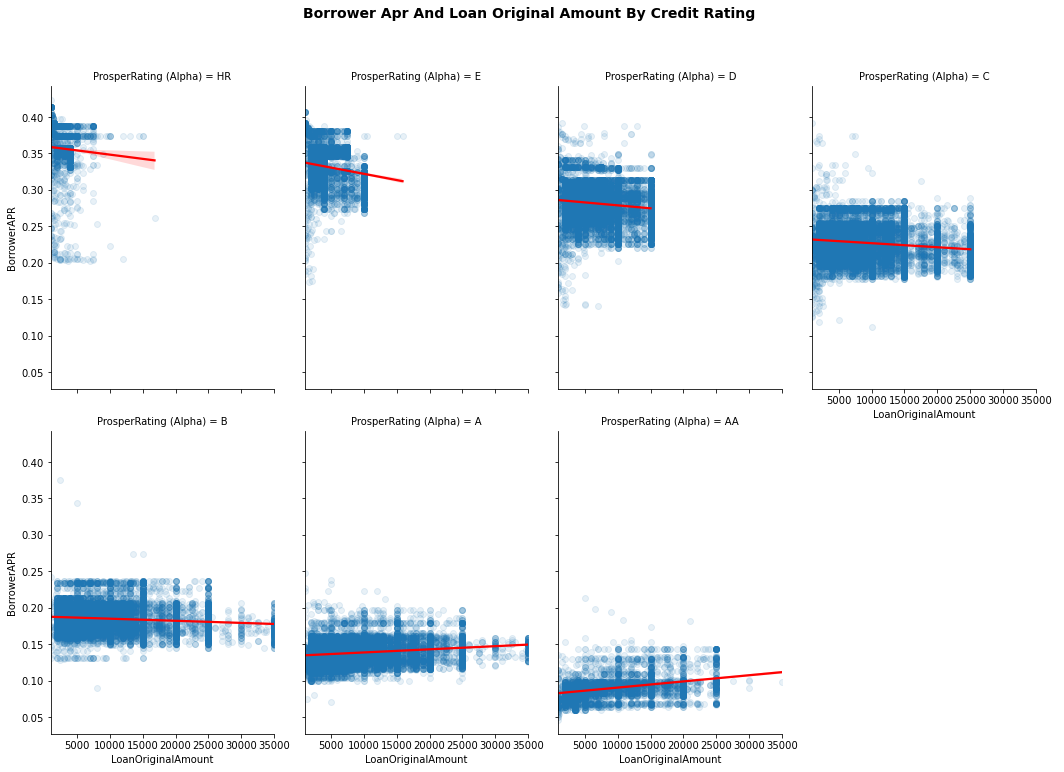

In [45]:
# Prosper rating effect on relationship of APR and loan amount
g=sb.FacetGrid(data = df_loans, aspect = (14.70/4)/(10.27/2), height = 10.27/2, col = 'ProsperRating (Alpha)', col_wrap = 4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1}, line_kws={'color':'red'});
g.add_legend();
plt.suptitle('Borrower APR and loan original amount by credit rating'.title(), y=1.04, fontsize=14, weight='bold');
plt.tight_layout();

The loan amount increases with a better rating, the borrower's APR decreases with a better rating. The relationship between borrower APR and loan amount raises from negative to slightly positive when the prosper ratings are increased from HR to A or better. Maybe because people with A or AA ratings tend to borrow more money, and pay on time.

#### BorrowerAPR considering rating and term

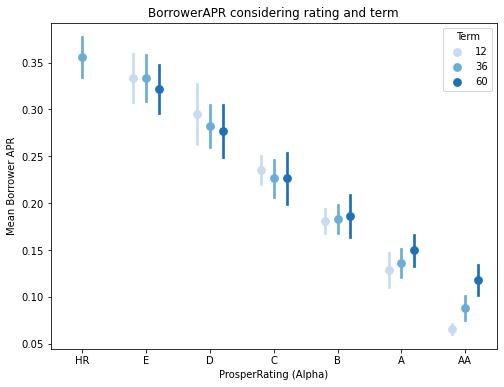

In [46]:
# BorrowerAPR considering rating and term
fig = plt.figure(figsize = [8,6])

ax = sb.pointplot(data = df_loans, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term', palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('BorrowerAPR considering rating and term')
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);

Notice that for prosper rating from HR to D the borrower APR increases with the decrease of borrow term, then it starts to shift from C to AA rating.

#### The rating and term effects on loan original amount 

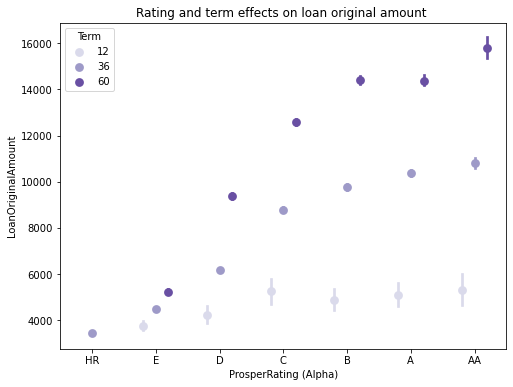

In [47]:
# Rating and term effects on loan original amount
fig, ax = plt.subplots(figsize=[8,6])

sb.pointplot(data = df_loans, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term', palette = 'Purples',
             linestyles = '', dodge = 0.4)
plt.title('Rating and term effects on loan original amount ');

Notice that with a better prosper rating, the loan amount of all three terms increases.

#### BorrowerAPR considering CreditScoreRangeUpper and ProsperScore

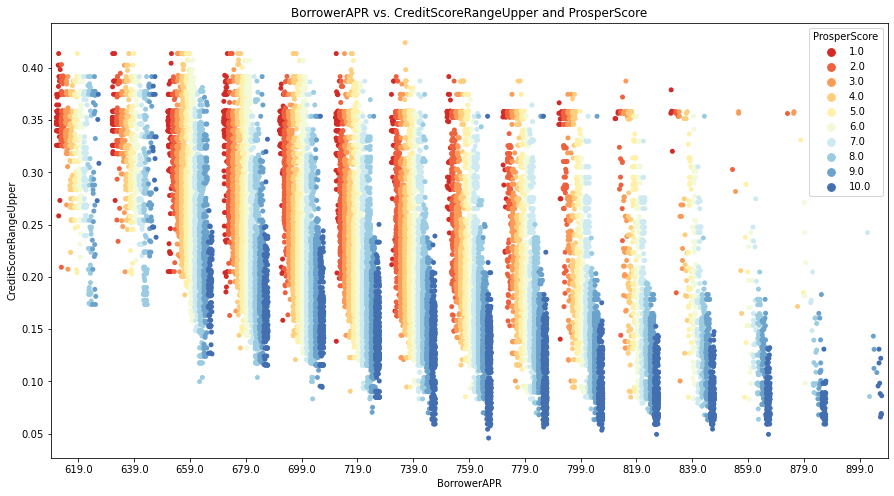

In [48]:
# BorrowerAPR vs. CreditScoreRangeUpper and ProsperScore
plt.figure(figsize = [15, 8])

sb.stripplot(data = df_loans, x = 'CreditScoreRangeUpper', y = 'BorrowerAPR', hue ='ProsperScore', jitter = 0.35,
             dodge = True, palette = 'RdYlBu')
plt.title('BorrowerAPR vs. CreditScoreRangeUpper and ProsperScore')
plt.xlabel('BorrowerAPR')
plt.ylabel('CreditScoreRangeUpper');

Notice that CreditScoreRangeUpper increase as BorrowerAPR decrease in the plots, this proves that CreditScoreRangeUpper and ProsperScore negatively correlated to BorrowerAPR.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> - The loan amount increases with a better rating, the borrower APR decreases with a better rating. The relationship between borrower APR and loan amount raises from negative to slightly positive when the prosper ratings are increased from HR to A or better and pay on time.
> - Notice that for prosper rating from HR to D the borrower APR increases with the decrease of borrow term, then it starts to shift from C to AA rating.
> - Notice that with a better prosper rating, the loan amount of all terms increases.
> - Notice that CreditScoreRangeUpper increase as BorrowerAPR decrease in the plots, This proves that CreditScoreRangeUpper and ProsperScore negatively correlated to BorrowerAPR.

### Were there any interesting or surprising interactions between features?

> - The borrower APR increases with the decrease of borrow term for people with HR to D ratings. Then it starts to shift for people with C to AA ratings, the APR decreases with the increase of borrow term.